# Sweet Lift Taxi Orders Prediction

# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

## Preparación

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

import numpy as np


In [91]:
#Carga de datos
df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
df.sort_index(inplace=True)

In [84]:
#Remuestreo por hora
df_hourly = df.resample('1H').sum()

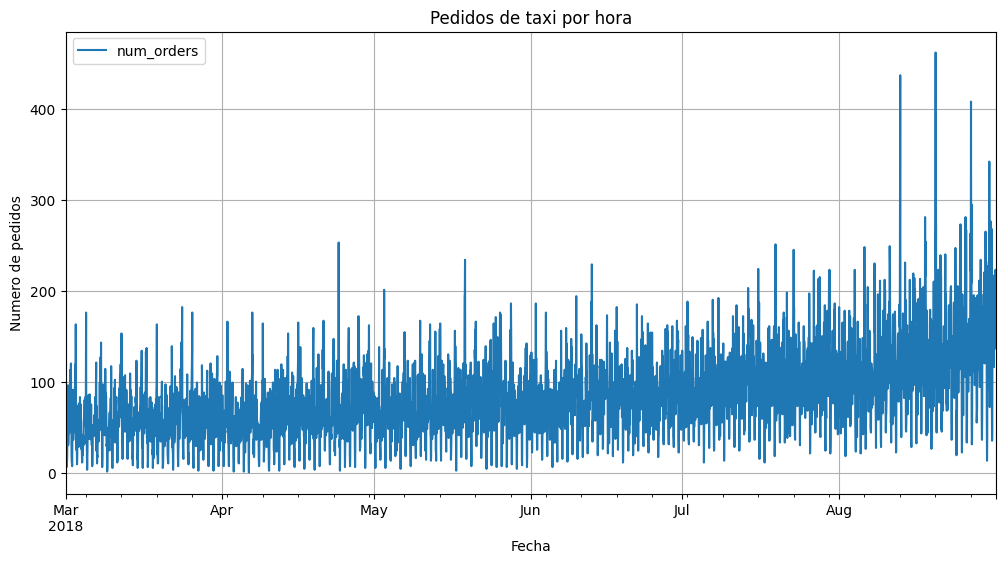

In [85]:
#Analisis exploratorio que me permite vizualizar tendencias y patrones de la data
df_hourly.plot(figsize=(12, 6))
plt.title("Pedidos de taxi por hora")
plt.ylabel("Numero de pedidos")
plt.xlabel("Fecha")
plt.grid(True)
plt.show()

In [86]:
#Reservamos el 10% para la prueba
split_idx = int(len(df_hourly) * 0.9)
train = df_hourly[:split_idx]
test = df_hourly[split_idx:]

In [87]:
#Creamos bases predictoras
def create_features(df):
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month
    return df

X_train = create_features(train.copy())
y_train = X_train.pop('num_orders')

X_test = create_features(test.copy())
y_test = X_test.pop('num_orders')

In [88]:
#Entrenamientos de modelos
modelos = [
    (LinearRegression(), "Linear Regression"),
    (DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, random_state=42), "Decision Tree"),
    (RandomForestRegressor(n_estimators=350, max_depth=15, random_state=42), "Random Forest"),
    (GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42), "GradientBoosting"),
    (XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42, verbosity=0), "XGBoost")
]

In [89]:
def evaluar_modelo(modelo, nombre, X_train, y_train, X_test, y_test):
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    print(f"{nombre}: RECM = {rmse:.2f}")
    return rmse

In [90]:
#Evaluacion de modelos
for modelo, nombre in modelos:
    evaluar_modelo(modelo, nombre, X_train, y_train, X_test, y_test)

Linear Regression: RECM = 66.53
Decision Tree: RECM = 51.16
Random Forest: RECM = 47.03
GradientBoosting: RECM = 47.85
XGBoost: RECM = 47.85


## Hallazgos

En la distribucion de los datos se encontro que los datos contienen registros de pedidos de taxi por intervalos de 10 minutos, desde marzo hasta agosto de 2018.

Tambien se encontro varias tendencias por variaciones estacionales y por hora, ya que hay mas pedidos en ciertos días y horas pico, asi como menor demanda en las madrugadas y algunos fines de semana.

## Conclusion
Se construyeron y evaluaron varios modelos de prediccion de la demanda de taxis por hora en aeropuertos.

El modelo Random Forest con 350 arboles y profundidad maxima de 15 logro un RECM de 47.03, cumpliendo con la solicitud de que el error no fuera mayor a 48.

Ahora bien, este modelo es el mas adecuado para predecir la cantidad de pedidos en la proxima hora, ya que nos ayuda a captar bien las variaciones temporales y reduce tanto el sesgo como la varianza.

Desde mi perspectiva la recomendacion es usar este modelo para planificar la asignacion de conductores durante las horas pico y de esta forma optimizar la operacion de Sweet Lift Taxi.